In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("bank.csv", sep=";")   # Bank dataset uses ";" as separator
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [3]:
# 2. Data Cleaning
# ------------------------
print("\nMissing values:\n", df.isnull().sum())

# Replace "unknown" with NaN and fill
df = df.replace("unknown", np.nan)
df = df.dropna()   # drop rows with NaN (or you could impute)


Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [4]:
# 3. Encode Categorical Features
# ------------------------
categorical_cols = df.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nEncoded DataFrame:\n", df.head())



Encoded DataFrame:
    age  job  marital  education  default  balance  housing  loan  contact  \
1   33    7        1          1        0     4789        1     1        0   
2   35    4        2          2        0     1350        1     0        0   
5   35    4        2          2        0      747        0     0        0   
6   36    6        1          2        0      307        1     0        0   
9   43    7        1          0        0      -88        1     1        0   

   day  month  duration  campaign  pdays  previous  poutcome  y  
1   11      8       220         1    339         4         0  0  
2   16      0       185         1    330         1         0  0  
5   23      3       141         2    176         3         0  0  
6   14      8       341         1    330         2         1  0  
9   17      0       313         1    147         2         0  0  


In [5]:
# 4. Split Data
# ------------------------
X = df.drop("y", axis=1)
y = df["y"]   # target column (0 = no, 1 = yes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
# 5. Train Decision Tree
# ------------------------
clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=5,
    min_samples_split=20,
    random_state=42
)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=42)

In [7]:
# 6. Model Evaluation
# ------------------------
y_pred = clf.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7843137254901961

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       119
           1       0.52      0.41      0.46        34

    accuracy                           0.78       153
   macro avg       0.68      0.65      0.66       153
weighted avg       0.77      0.78      0.78       153



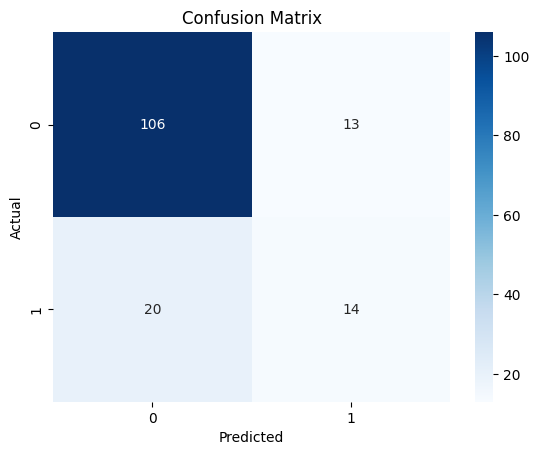

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

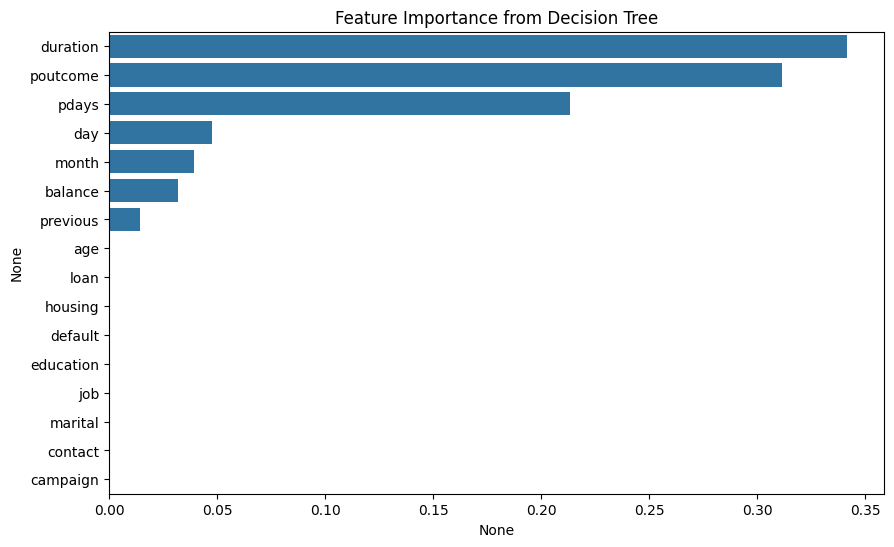

In [9]:
# 7. Feature Importance
# ------------------------
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance from Decision Tree")
plt.show()

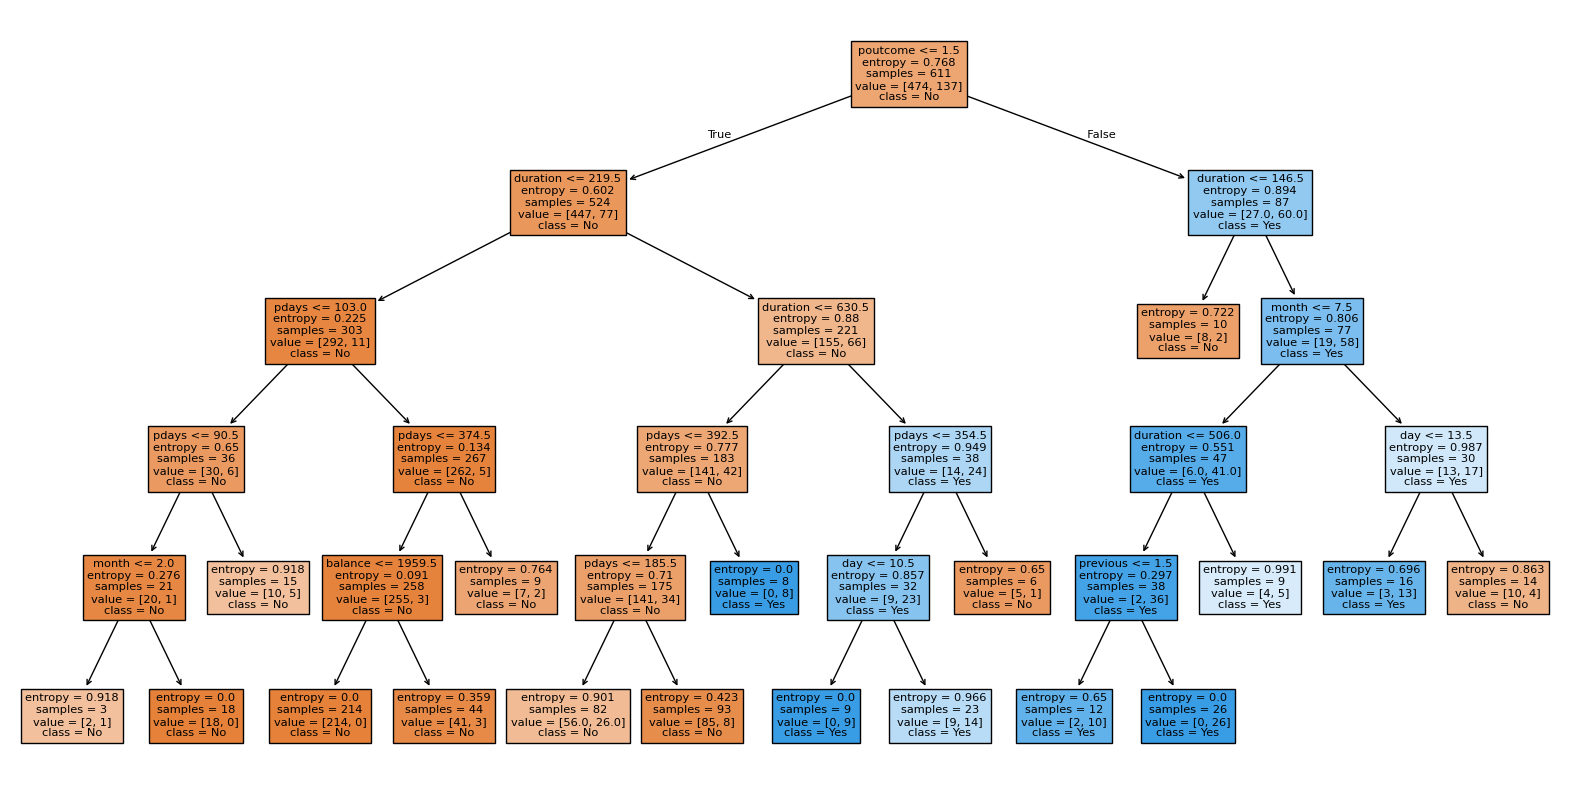

In [10]:
# 8. Visualize Tree
# ------------------------
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.show()